In [1]:
import nrrd, numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
outputs = np.load("/Users/jmarsill/Downloads/DEEPMIND/outs_0_FULL.npy")
# outputs = nrrd.read("/Users/jmarsill/h4h/NECKTEST2/outs_2_FULL.nrrd")
outputs[0].shape

(512, 512)

In [8]:
outputs[0].max()

7

In [5]:
inputs = np.load("/Users/jmarsill/Downloads/DEEPMIND/input_0_FULL.npy")
# inputs = nrrd.read("/Users/jmarsill/h4h/NECKTEST2/targ_2_FULL.nrrd")

In [9]:
inputs.shape

(170, 512, 512)

<Figure size 640x480 with 0 Axes>

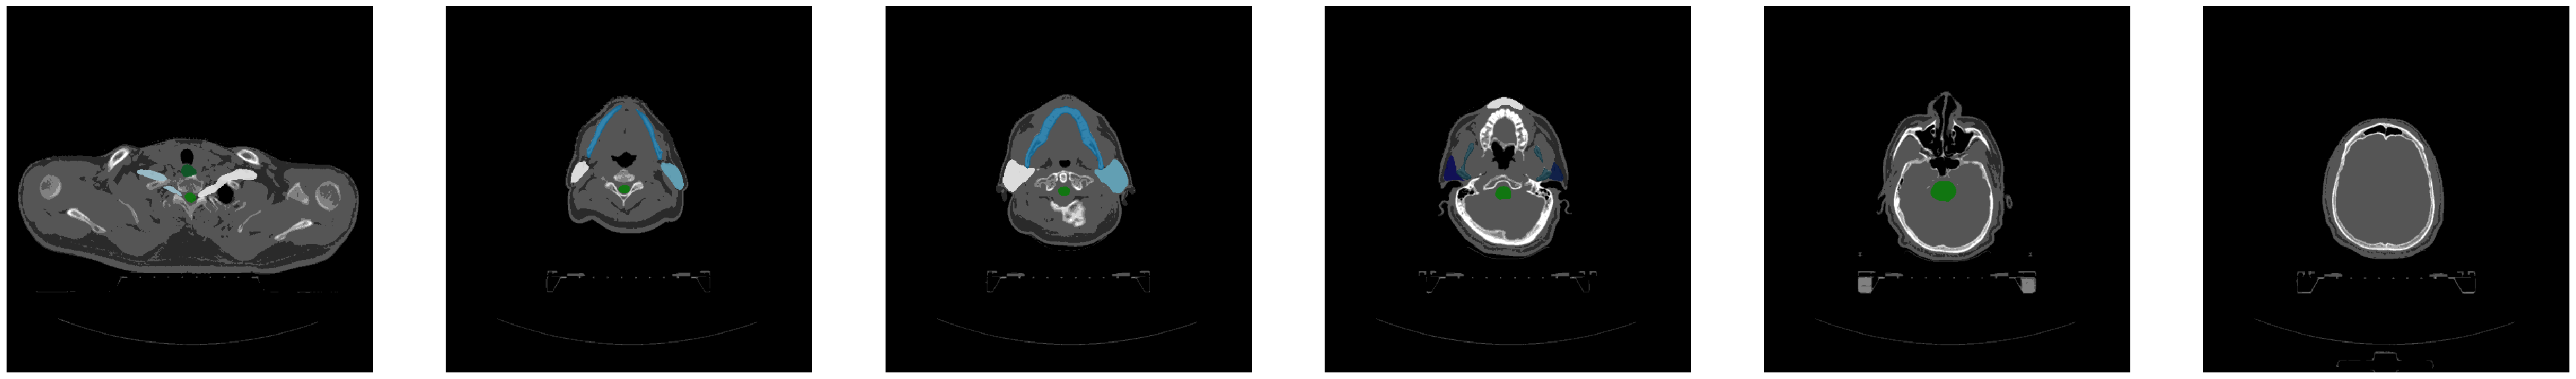

In [10]:
plt.figure()
slices = [45, 85, 95, 105, 115, 135]
fig = plt.figure(figsize=(50,25))
for i, val in enumerate(slices):
    # nrrd version
    # slice_ = inputs[0][val]
    # npy version
    slice_ = inputs[val]

    ax1 = fig.add_subplot(1,6,1+i)
    # nrrd...
    # targ_ = np.round(outputs[0][val]==4)
    # npy version
    targ_ = np.round(outputs[val])
    targed = np.ma.masked_where(targ_ == 0, targ_)
    ax1.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax1.imshow(targed*2, alpha=0.8, cmap='ocean', interpolation='none')
    # ax1.set_title("Ground Truth")
    ax1.axis('off')

#     ax2 = fig.add_subplot(3,6,7+i)
#     out_ = np.round(ou[val])
#     outed = np.ma.masked_where(out_ == 0, out_)
#     ax2.imshow(np.round(slice_), cmap='gray', interpolation='none')
#     ax2.imshow(outed*3, alpha=0.8, cmap='jet', interpolation='none')
#     # ax2.set_title("Prediction")
#     ax2.axis('off')
#     ax3 = fig.add_subplot(3,6,13+i)
#     diff = np.round(targ_ - out_)
#     diffed = np.ma.masked_where(diff == 0, diff)
#     ax3.imshow(np.round(slice_), cmap='gray', interpolation='none')
#     ax3.imshow(diffed*4, alpha=0.8, cmap='rainbow', interpolation='none')
#     # ax3.set_title("Difference")
#     ax3.axis('off')
#     print(i)
    # fig.savefig(f'/Users/josephmarsilla/SegmentHN/paper/55/{i}.png')

plt.show()

In [2]:
raw = nrrd.read("/Users/jmarsill/outs_0_FULL.nrrd")

In [3]:
raw[0].shape

(217, 512, 512)

In [30]:
raw_array = raw[0]

In [31]:
raw_array[0] *= raw_array.min()

In [16]:
import torch

In [32]:
raw_tensor = torch.from_numpy(raw_array)

In [33]:
raw_tensor.size()

torch.Size([8, 217, 292, 292])

In [34]:
class_ = torch.argmax(raw_tensor, 0)

In [35]:
class_.max()

tensor(7)

In [36]:
class_.shape

torch.Size([217, 292, 292])

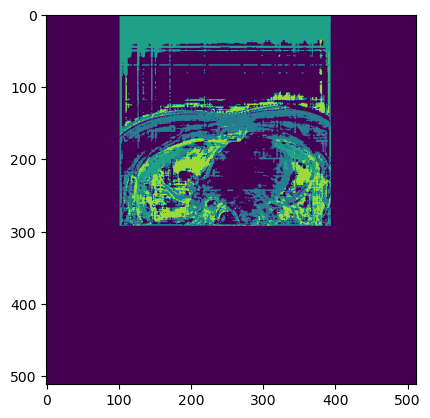

In [5]:
for i, slice in enumerate(raw[0]):
    plt.imshow(slice)
    plt.show()
    break